# **Deep Learning: Transfer Learning**

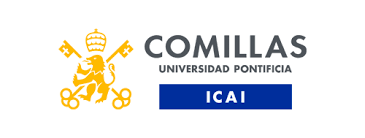

***

## Importar depencendias

En este notebook vamos a ejecutar cnn sobre nuestro dataset. Probaremos diferentes modelos tocando parámetros de configuración como las unfreeze layers y las epochs. 
Estos modelos son de la librería pytorch, la cuál es homologa a keras pero hemos decidido usar esta por probar nuevas librerias y familiarizarnos con ella. 

In [1]:
from cnn import CNN
import torchvision
from cnn import load_data
from cnn import load_model_weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from torch.utils.data import DataLoader


En nuestro caso usaremos gpu para poder entrenar las cnn a una mayor velocidad.
Con la función is_available vemos si coge correctamente como motor de procesamiento la gpu

In [2]:
torch.cuda.is_available()

True

Si recibe un True guardaremos en la variable device a cuda y si no la cpu. La variable device sera un parametro de la función train que indicará con que motor de procesamiento realizar el entrenamiento de la cnn

In [3]:
if torch.cuda.is_available():
    # Configurar el dispositivo para usar GPU
    device = torch.device("cuda")
    print("GPU disponible:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU no disponible. Se utilizará la CPU.")

GPU disponible: NVIDIA GeForce GTX 1050


Para ver que modelos de cnn tiene la libreria torch las vamos a listar para saber cuales podemos probar con nuestro dataset

In [4]:
# Pytorch has many pre-trained models that can be used for transfer learning
classification_models = torchvision.models.list_models(module=torchvision.models)
print(classification_models)

['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'squeezenet1_0

## Carga de datos 

Cogemos de nuestros datos el conjunto qeu utilizaremos para hacer el entrenamiento del modelo y el qeu usaremos apra hacer la validación, epecificando el tamaño de bacth (en este caso 32) y el número de y el tamaño de pixeles de nuestras imagenes que en nuestro caso son de 224*224 pixeles


In [8]:
# Load data and model 
train_dir = './Grayscale_Face_images/train'
valid_dir = './Grayscale_Face_images/test'

train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=32, 
                                                    img_size=224)


## Carga de modelo 

A la hora de cargar el modelo inicaremos que tipo de cnn que queremos entrenar (en este caso resnet 152).

In [ ]:
model = CNN(torchvision.models.resnet152(weights='DEFAULT'), num_classes)
model = model.to(device)

Ahora desarrollaremos una función que lo que hará es mostrarnos una muestra del dataset que tenemos con sus etiquetas.

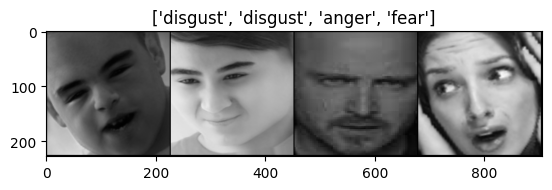

In [6]:
# Visualize a few images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(valid_loader.dataset[i][1])
out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])

Por último entrenaremos el modelo.
A este le indicaremos que utilice el optimizador adams, esta ayuda a minimizar la función de perdida durante el entrenamiento.

También deberemos indicar el número de epochs, estas indican el número de veces que el modelo verá todo el conjunto de datos de entrenamiento durante el proceso de entrenamiento.


In [11]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()
history = model.train_model(train_loader, valid_loader, optimizer, criterion, epochs=30, device=device)

Epoch 1/30 - Train Loss: 1.8851, Train Accuracy: 0.3846
Epoch 1/30 - Validation Loss: 1.8877, Validation Accuracy: 0.3746
Epoch 2/30 - Train Loss: 1.8858, Train Accuracy: 0.3784
Epoch 2/30 - Validation Loss: 1.8761, Validation Accuracy: 0.3893
Epoch 3/30 - Train Loss: 1.8788, Train Accuracy: 0.3830
Epoch 3/30 - Validation Loss: 1.8890, Validation Accuracy: 0.3738
Epoch 4/30 - Train Loss: 1.8780, Train Accuracy: 0.3871
Epoch 4/30 - Validation Loss: 1.8798, Validation Accuracy: 0.3885
Epoch 5/30 - Train Loss: 1.8814, Train Accuracy: 0.3828
Epoch 5/30 - Validation Loss: 1.8741, Validation Accuracy: 0.3893
Epoch 6/30 - Train Loss: 1.8765, Train Accuracy: 0.3842
Epoch 6/30 - Validation Loss: 1.8725, Validation Accuracy: 0.4000
Epoch 7/30 - Train Loss: 1.8739, Train Accuracy: 0.3908
Epoch 7/30 - Validation Loss: 1.8656, Validation Accuracy: 0.4131
Epoch 8/30 - Train Loss: 1.8750, Train Accuracy: 0.3926
Epoch 8/30 - Validation Loss: 1.8732, Validation Accuracy: 0.4016
Epoch 9/30 - Train Loss:

Podemos ver que las accuracys conseguidas no son muy elevadas, pero razonando podemos comprender que esto sea así ya que este tipo de clasificación puede llegar a ser muy complejo. Clasificar 8 tipos de emociones por una imagen es una tarea que a un humano también le costaría bastante.

Una vez entrenado guardaremos el modelo haciendo uso de la función save.

In [12]:
model.save('resnet152unfreeze9 -30epoch')

Con este código cargaremos los modelos que hemos entrenado los cuales están el la carpeta models/models_cnn.
Hemos dejado elresnet152 con 9 unfreeze layers y 30 epochs.

In [14]:
# Load model
model_weights = load_model_weights('resnet152unfreeze9 -30epoch')
my_trained_model = CNN(torchvision.models.resnet152(weights='DEFAULT'), num_classes)
my_trained_model.load_state_dict(model_weights)

<All keys matched successfully>

## Predecir

Ejecuatremos la función predict la que clasificará el conjunto de imagen de validación según lo qeu el modelo etrenado decida.

Esta función esta en cnn.py y es importada.

In [15]:
predicted_labels = my_trained_model.predict(valid_loader)

## Resultado

Tras realizar las predicciones  mostraremos aleatoiamente algunas de las predicciones qeu ha realizado nuestro modelo.

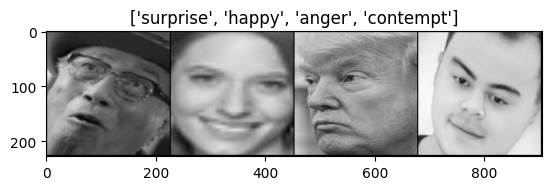

In [24]:
# Get a few random images
random_indices = np.random.choice(len(valid_loader.dataset), size=4, replace=False)
inputs = []
classes = []
for i in random_indices:
    inputs.append(valid_loader.dataset[i][0])
    classes.append(predicted_labels[i])

out = torchvision.utils.make_grid(inputs)
classnames = train_loader.dataset.classes
imshow(out, title=[classnames[x] for x in classes])